In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = '0.2'

In [2]:
obs = 12
np.random.seed(15)
data = np.random.randint(0,5, obs*5).reshape(obs,5)
data_unique = np.unique(data, axis=0)
xs = np.c_[np.ones([data_unique.shape[0]]), data_unique] 
ys = np.random.choice(list(range(1,10)), obs)
ys.resize(obs,1)

xs.shape

(12, 6)

In [3]:
xs[:4] #the data with the bias added

array([[1., 0., 3., 0., 4., 3.],
       [1., 0., 4., 0., 4., 3.],
       [1., 1., 0., 0., 4., 0.],
       [1., 1., 2., 0., 0., 0.]])

In [4]:
ys[:4] #desired output for each unique observation

array([[1],
       [8],
       [7],
       [5]])

In [5]:
weights = lambda ins, outs: np.random.randn(ins, outs)

In [43]:
ins = 5
outs = 1
nodes = 17

wi = weights(ins+1, nodes)
ws = weights(nodes, outs) 
err = []

In [44]:
xs.shape, wi.shape, (xs @ wi).shape, ws.shape, ((xs @ wi) @ ws).shape

((12, 6), (6, 17), (12, 17), (17, 1), (12, 1))

In [45]:
for i in range(10000):
    x = xs @ wi
    x = np.sin(x)
    yh = x @ ws
    
    e = (yh - ys) * 1
    ws -= (x.T @ e) * .03
    e = np.sum(np.abs(e))
    
    if e < .05:
        print('we have converged after {} iterations'.format(i))
        print(ws)
        break
        
        
    err.append(e)

we have converged after 303 iterations
[[-0.96068869]
 [-3.86824327]
 [ 1.34054125]
 [-1.01396869]
 [-3.89242302]
 [ 0.76276891]
 [-6.12791895]
 [ 4.42039164]
 [-3.55750704]
 [ 3.41865374]
 [-5.55163567]
 [-3.84031846]
 [ 4.36790886]
 [-3.15033225]
 [-2.67114186]
 [-2.68426956]
 [ 2.62935409]]


In [46]:
min(err)

0.05057656744201511

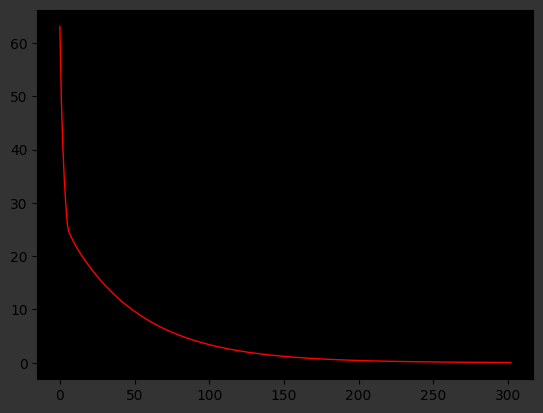

In [47]:
plt.axes().set_facecolor('black')
plt.plot(err,color='red', linewidth=1)
plt.show()

In [99]:
yh

array([[1.00576937],
       [7.98752921],
       [6.99882007],
       [4.99625192],
       [4.99440272],
       [4.004144  ],
       [7.99133382],
       [5.99803641],
       [7.00135077],
       [0.99945825],
       [0.99644832],
       [4.99944923]])

In [100]:
ys

array([[1],
       [8],
       [7],
       [5],
       [5],
       [4],
       [8],
       [6],
       [7],
       [1],
       [1],
       [5]])

In [101]:
a = np.arange(1,5).reshape(1,4)
a

array([[1, 2, 3, 4]])

In [102]:
b = np.arange(.1,.5,.1).reshape(4,1)
b

array([[0.1],
       [0.2],
       [0.3],
       [0.4]])

In [103]:
a @ b

array([[3.]])

In [104]:
c = np.c_[b, b, b, b]
d = np.r_[a, a, a, a, a]
d, c

(array([[1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4],
        [1, 2, 3, 4]]),
 array([[0.1, 0.1, 0.1, 0.1],
        [0.2, 0.2, 0.2, 0.2],
        [0.3, 0.3, 0.3, 0.3],
        [0.4, 0.4, 0.4, 0.4]]))

In [105]:
a @ c

array([[3., 3., 3., 3.]])

In [106]:
d @ c

array([[3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.],
       [3., 3., 3., 3.]])

In [107]:
import sys
sys.version

'3.11.3 (tags/v3.11.3:f3909b8, Apr  4 2023, 23:49:59) [MSC v.1934 64 bit (AMD64)]'